**Study Hours and Test Scores**

- Columns: Study_Hours (Categorical: "<5", "5-10", ">10"), Test_Score (Continuous)
- Data Simulation: Use np.random.normal to create different mean scores for each study hour group.

**Hypothesis**:
- Null: There is no significant difference in test scores across study hour groups.
- Alternative: There is a significant difference in test scores across study hour groups.

C:\Users\marmi\AppData\Local\Temp\ipykernel_9932\844544362.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Study_Hours', y='Test_Score', data=data, palette="Set2")


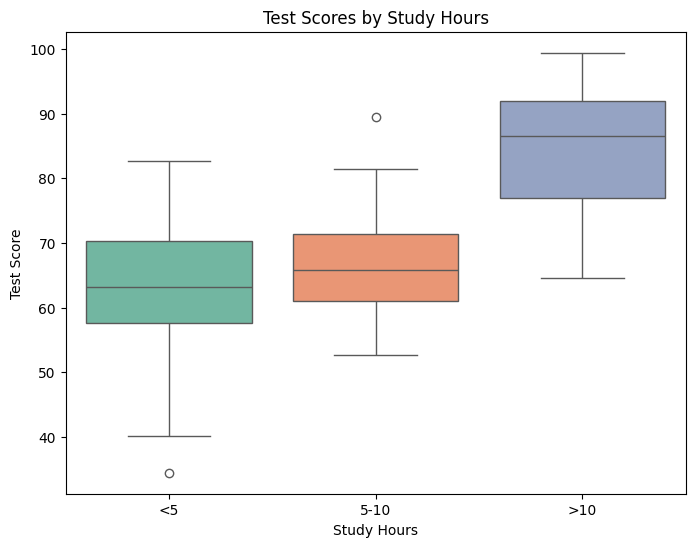

ANOVA Result: F=54.56, p-value=0.000000000000000018192603077169
Conclusion: Reject the null hypothesis. There is a significant difference in test scores between study hour groups.


In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Synthetic Dataset
np.random.seed(0)
data = pd.DataFrame({
    'Study_Hours': np.repeat(['<5', '5-10', '>10'], 40),
    'Test_Score': np.concatenate([
        np.random.normal(60, 10, 40),  # "<5" hours group
        np.random.normal(70, 10, 40),  # "5-10" hours group
        np.random.normal(80, 10, 40)   # ">10" hours group
    ])
})

# Step 2: Perform ANOVA Test
groups = [data['Test_Score'][data['Study_Hours'] == hour] for hour in data['Study_Hours'].unique()]
anova_result = stats.f_oneway(*groups)

# Step 3: Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Study_Hours', y='Test_Score', data=data, palette="Set2")
plt.title('Test Scores by Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.show()

# Step 4: Conclusion
alpha = 0.05
if anova_result.pvalue < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in test scores between study hour groups."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in test scores between study hour groups."

print(f"ANOVA Result: F={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.30f}")
print("Conclusion:", conclusion)

# NOTE : When p value is 0.00 there is a very strong difference between the groups. 

# Using Titanic Datasets

**Objective**:
- Test if the average age of passengers varies significantly by passenger class (Pclass).

**Hypothesis**:
- Null: There is no significant difference in average age across different passenger classes.
- Alternative: There is a significant difference in average age across different passenger classes.

<ipython-input-2-ac26b4f15599>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=titanic_data, palette="Blues")


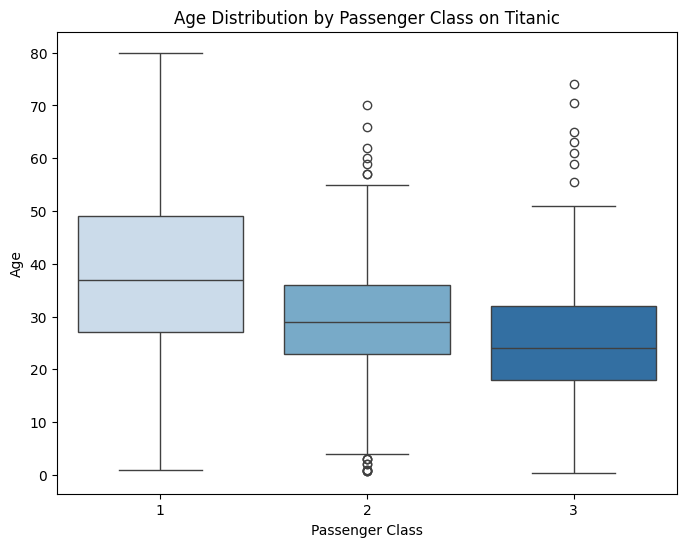

ANOVA Result: F=57.44, p-value=0.0000
Conclusion: Reject the null hypothesis. There is a significant difference in age across passenger classes.


In [ ]:
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Drop missing age data for analysis
titanic_data = titanic_data.dropna(subset=['age'])

# ANOVA Test: Average Age by Passenger Class
groups = [titanic_data['age'][titanic_data['pclass'] == pclass] for pclass in titanic_data['pclass'].unique()]
anova_result = stats.f_oneway(*groups)

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=titanic_data, palette="Blues")
plt.title('Age Distribution by Passenger Class on Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Conclusion
alpha = 0.05
if anova_result.pvalue < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in age across passenger classes."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in age across passenger classes."

print(f"ANOVA Result: F={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")
print("Conclusion:", conclusion)
